In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.pyplot import FuncFormatter
import pandas as pd 
import dataframe_image as dfi

#### 1] Distribution of customers across states.

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_17972\445164046.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


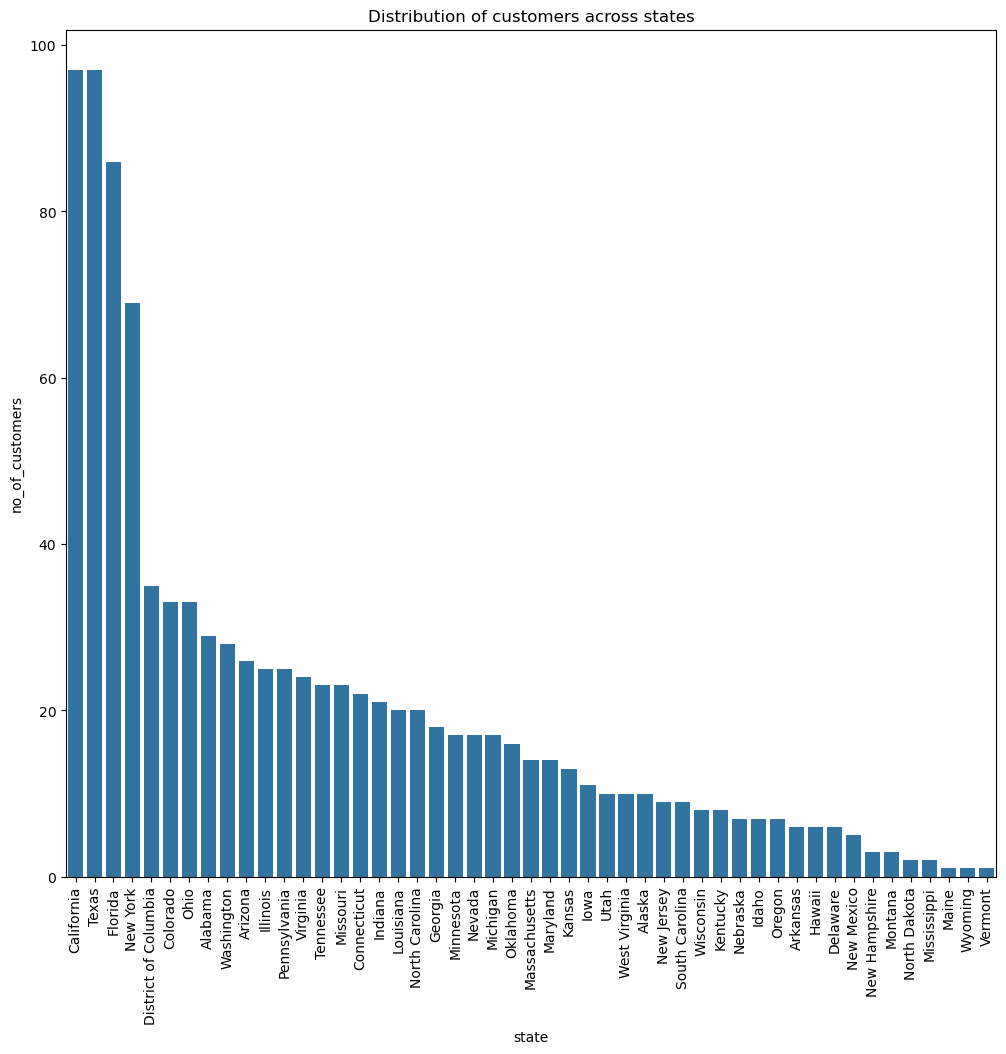

In [3]:
conn = mysql.connector.connect(
    host= '127.0.0.1',
    user= 'root',
    password= 'chetuchetu@#786',
    database= 'newschema'
)

query =  """
SELECT 
      state, 
      COUNT(*) as no_of_customers
FROM customer_t
GROUP BY state
ORDER BY no_of_customers DESC
"""


df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,11))
plt.xticks(rotation=90)
plt.title('Distribution of customers across states')
sns.barplot(data=df, x='state', y='no_of_customers')
plt.show()

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_17972\1683211485.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


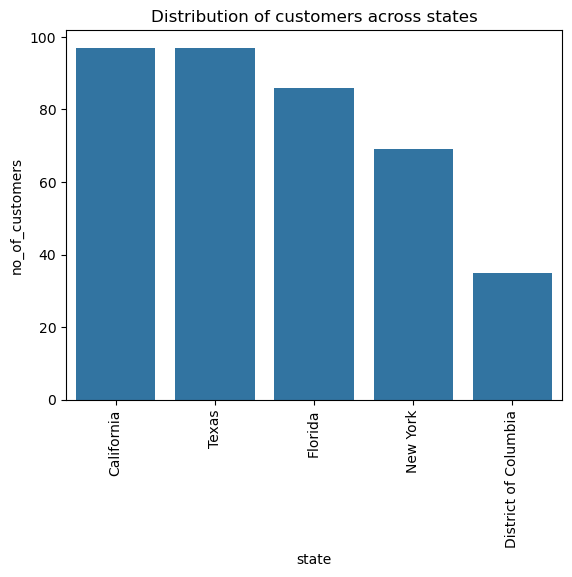

In [5]:
query =  """
SELECT 
      state, 
      COUNT(*) as no_of_customers
FROM customer_t
GROUP BY state
ORDER BY no_of_customers DESC
LIMIT 5
"""


df = pd.read_sql_query(query, conn)


plt.xticks(rotation=90)
plt.title('Distribution of customers across states')
sns.barplot(data=df, x='state', y='no_of_customers')
plt.show()

#### 2] Average rating in each quarter.

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_10988\1868582727.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Text(0.5, 1.0, 'Bar Plot for average rating for each quarter')

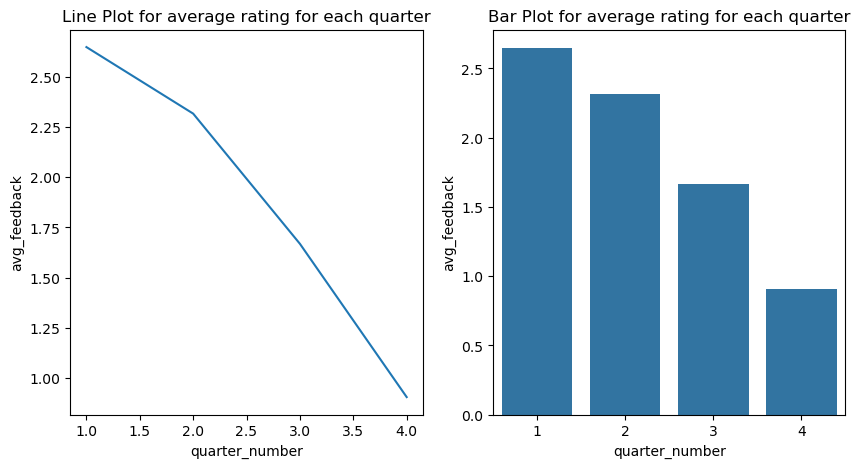

In [74]:
query =  """
WITH feed_bucket AS
(
    SELECT 
	CASE 
			WHEN customer_feedback = 'Very Good' THEN 5
			WHEN customer_feedback = 'Good' THEN 4
            WHEN customer_feedback = 'Average' THEN 3
            WHEN customer_feedback = 'Poor' THEN 2
            WHEN customer_feedback = 'Very Poor' THEN 1
            ELSE 0
			END AS feedback_count,
            quarter_number
	FROM order_t 
) 
SELECT 
      quarter_number,
      AVG(feedback_count) avg_feedback
FROM feed_bucket
GROUP BY quarter_number
ORDER BY 1
"""

df = pd.read_sql_query(query, conn)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.lineplot(data=df, x='quarter_number', y='avg_feedback', ax=axes[0])
axes[0].set_title('Line Plot for average rating for each quarter')

sns.barplot(data=df, x='quarter_number', y='avg_feedback', ax=axes[1])
axes[1].set_title('Bar Plot for average rating for each quarter')

#### 3] Satisfaction rate over time for custoemers.

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_10988\1112512283.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


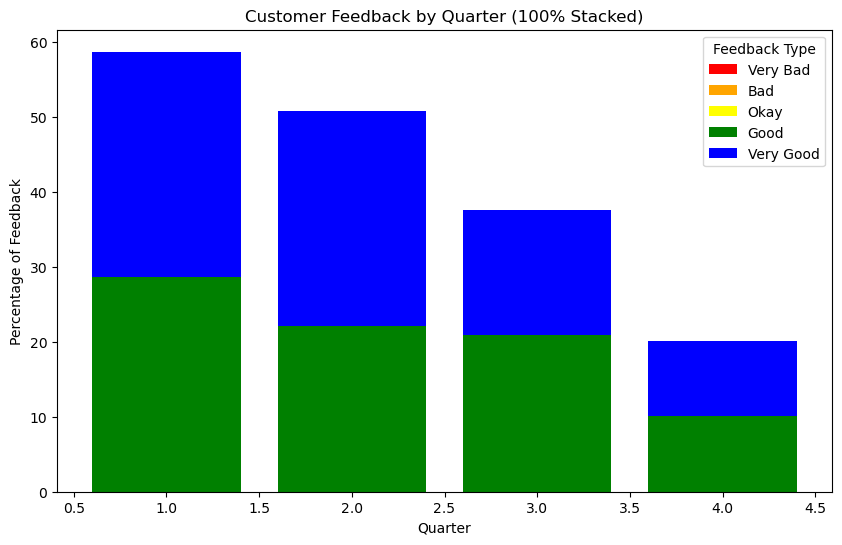

In [152]:
query =  """
WITH cust_feedback AS
(
	SELECT 
		quarter_number,
		SUM(CASE WHEN customer_feedback = 'Very Good' THEN 1 ELSE 0 END) AS very_good,
		SUM(CASE WHEN customer_feedback = 'Good'THEN 1 ELSE 0 END) AS good,
        SUM(CASE WHEN customer_feedback = 'Average' THEN 1 ELSE 0 END) AS average,
        SUM(CASE WHEN customer_feedback = 'Poor' THEN 1 ELSE 0 END) AS poor,
        SUM(CASE WHEN customer_feedback = 'VERY Poor' THEN 1 ELSE 0 END) AS very_poor,
		COUNT(customer_feedback) AS total_feedbacks
	FROM order_t
	GROUP BY quarter_number
)
SELECT quarter_number,
        (very_good/total_feedbacks)*100 perc_very_good,
        (good/total_feedbacks)*100 perc_good,
        (average/total_feedbacks)*100 perc_average,
        (poor/total_feedbacks)*100 perc_poor,
        (very_poor/total_feedbacks)*100 perc_very_poor
FROM cust_feedback
ORDER BY 1
"""

df = pd.read_sql_query(query, conn)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df['quarter_number'], df['perc_very_poor'], label='Very Bad', color='red')
ax.bar(df['quarter_number'], df['perc_poor'], bottom=df['perc_very_poor'], label='Bad', color='orange')
ax.bar(df['quarter_number'], df['perc_average'], bottom=df['perc_very_poor'] + df['perc_poor'], label='Okay', color='yellow')
ax.bar(df['quarter_number'], df['perc_good'], bottom=df['perc_very_poor'] + df['perc_poor'] + df['perc_average'], label='Good', color='green')
ax.bar(df['quarter_number'], df['perc_very_good'], bottom=df['perc_very_poor'] + df['perc_poor'] + df['perc_average'] + df['perc_good'], label='Very Good', color='blue')


ax.set_xlabel('Quarter')
ax.set_ylabel('Percentage of Feedback')
ax.set_title('Customer Feedback by Quarter (100% Stacked)')
ax.legend(title='Feedback Type')

plt.show()

#### 4] Top 5 vehicle makers preferred by the customers.

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_10988\2383251967.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


<Axes: title={'center': 'Top 5 vehicle makers prefrred by the customers'}, xlabel='vehicle_maker', ylabel='number_of_customers'>

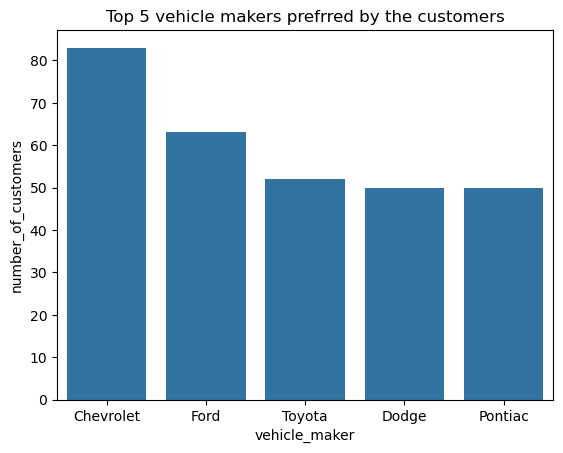

In [90]:
query =  """
SELECT
      vehicle_maker,
      COUNT(DISTINCT cust.customer_id) AS number_of_customers
FROM product_t pro 
	INNER JOIN order_t ord
	    ON pro.product_id = ord.product_id
	INNER JOIN customer_t cust
	    ON ord.customer_id = cust.customer_id
GROUP BY vehicle_maker
ORDER BY 2 desc
LIMIT 5
"""

df = pd.read_sql_query(query, conn)

plt.title('Top 5 vehicle makers prefrred by the customers')
sns.barplot(data=df, x='vehicle_maker', y='number_of_customers')

#### 5] Preferred vehicle make in each state.

In [8]:
query =  """
SELECT state, vehicle_maker FROM (
	SELECT
		  state,
		  vehicle_maker,
		  COUNT(DISTINCT cust.customer_id) AS no_of_cust,
		  RANK() OVER (PARTITION BY cust.state ORDER BY COUNT(DISTINCT cust.customer_id) DESC) AS rnk
FROM product_t pro 
	 INNER JOIN order_t ord
	    ON pro.product_id = ord.product_id
	INNER JOIN customer_t cust
	    ON ord.customer_id = cust.customer_id
	GROUP BY cust.state, pro.vehicle_maker) tbl
WHERE rnk = 1

"""

df = pd.read_sql_query(query, conn)


C:\Users\Ckhop\AppData\Local\Temp\ipykernel_17972\2957747318.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

dd = pd.read_csv(r'C:\Users\Ckhop\Dropbox\My PC (LAPTOP-48O7E0E8)\Downloads\vehicle_make_in_each_state.csv')

dd

,state,vehicle_maker
0,Alabama,Dodge
1,Alaska,Chevrolet
2,Arizona,Cadillac
3,Arizona,Pontiac
4,Arkansas,Chevrolet
5,Arkansas,GMC
6,Arkansas,Mitsubishi
7,Arkansas,Pontiac
8,Arkansas,Suzuki
9,Arkansas,Volkswagen


## Related to revenue and orders.

#### 6] The trend of number of orders by quarters.

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_10988\1115124667.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


<Axes: title={'center': 'Trend of number of orders by quarters'}, xlabel='quarter_number', ylabel='total_orders'>

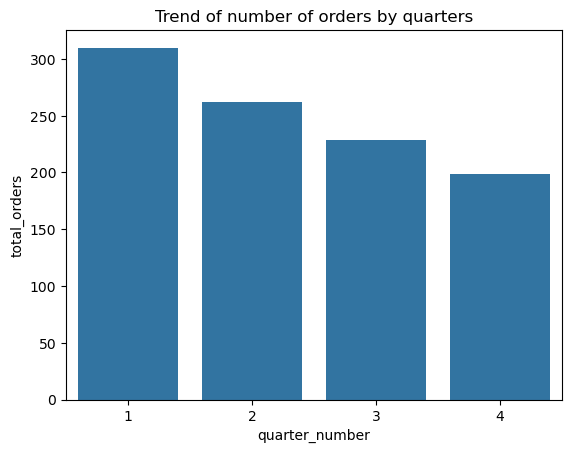

In [97]:
query =  """
SELECT 
	  quarter_number, 
	  COUNT(order_id) as total_orders
FROM order_t
GROUP BY quarter_number
ORDER BY quarter_number ASC

"""

df = pd.read_sql_query(query, conn)

plt.title('Trend of number of orders by quarters')
sns.barplot(data=df, x='quarter_number', y='total_orders')

#### 7] Quarter over Quarter % change in revenue? 

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_10988\2086738446.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


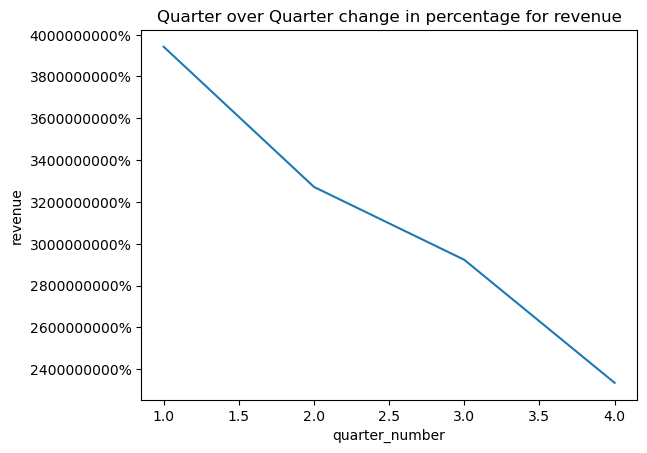

In [125]:
query =  """
WITH QoQ AS 
(
	SELECT
		  quarter_number,
		  SUM((vehicle_price * quantity) * (1 - discount / 100)) AS revenue
	FROM order_t
	GROUP BY quarter_number
)
SELECT
      quarter_number,
  	  revenue,
      LAG(revenue) OVER (ORDER BY quarter_number) AS previous_revenue,
      ROUND(((revenue - LAG(revenue) OVER (ORDER BY quarter_number)) / LAG(revenue) OVER (ORDER BY quarter_number)) * 100,2) AS qoq_perc_change
FROM QoQ; 

"""

df = pd.read_sql_query(query, conn)

plt.title('Quarter over Quarter change in percentage for revenue')
sns.lineplot(data=df, x= 'quarter_number', y= 'revenue')

def add_percentage(y, _):
    return '{:.0f}%'.format(y * 100)

plt.gca().yaxis.set_major_formatter(FuncFormatter(add_percentage))

#### 8] The trend of revenue and orders by quarters

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_10988\3175791230.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Text(0.5, 1.0, 'Lineplot between quarters and order')

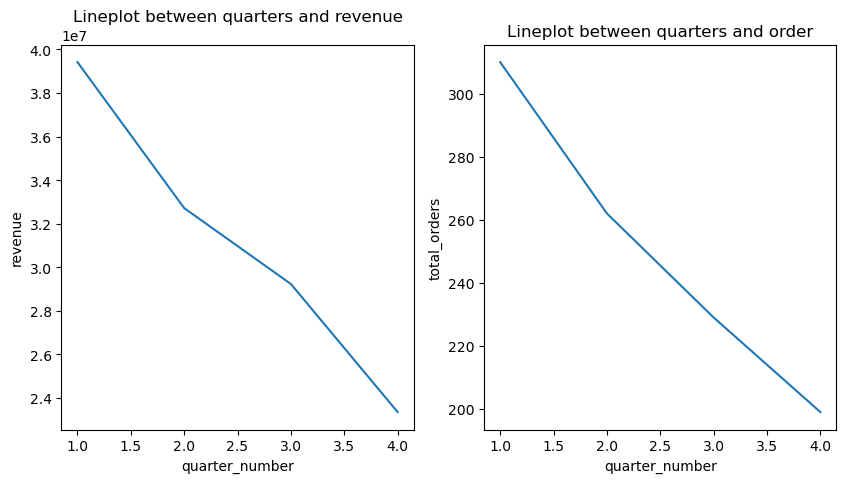

In [133]:
query =  """
SELECT  
      quarter_number,
	  SUM((vehicle_price * quantity) * (1 - discount / 100)) AS revenue,
      COUNT(order_id) AS total_orders
FROM order_t
GROUP BY quarter_number
ORDER BY 1;
"""

df = pd.read_sql_query(query, conn)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.lineplot(data=df, x='quarter_number', y='revenue', ax=axes[0])
axes[0].set_title('Lineplot between quarters and revenue')

sns.lineplot(data=df, x='quarter_number', y='total_orders', ax=axes[1])
axes[1].set_title('Lineplot between quarters and order')

#### 9] The average discount offered for different types of credit cards.

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_10988\1016670756.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


<Axes: title={'center': ' The average discount offered for different types of credit cards.'}, xlabel='credit_card_type', ylabel='average_discount'>

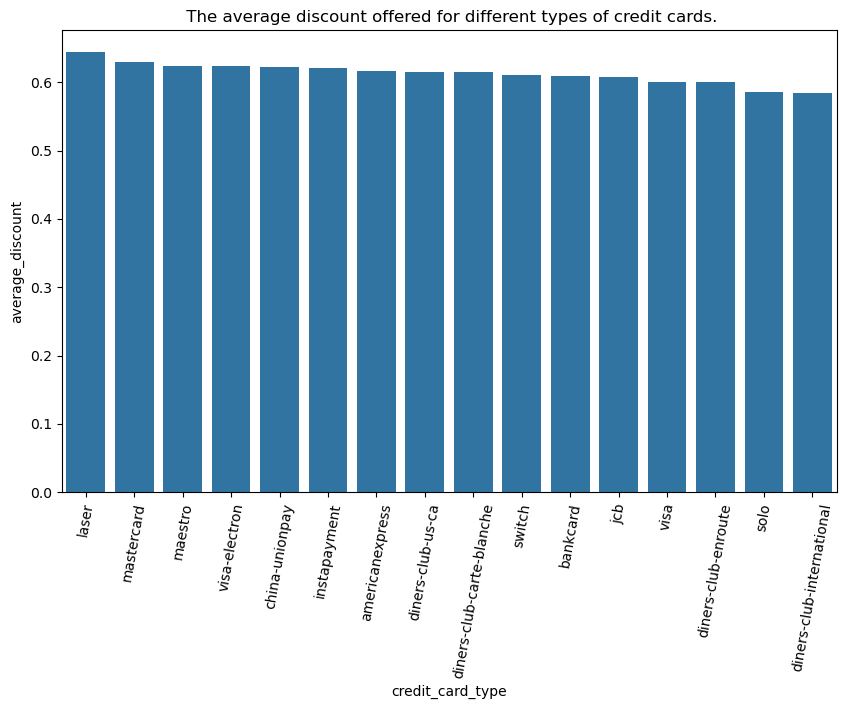

In [139]:
query =  """
SELECT 
     credit_card_type, 
     AVG(discount) AS average_discount
FROM order_t ord 
INNER JOIN customer_t cust
	ON ord.customer_id = cust.customer_id
GROUP BY credit_card_type
ORDER BY 2 DESC;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
plt.title(' The average discount offered for different types of credit cards.')
plt.xticks(rotation=80)
sns.barplot(data=df, x='credit_card_type', y='average_discount')

#### Average time taken to ship orders by Quarter

C:\Users\Ckhop\AppData\Local\Temp\ipykernel_10988\2963572947.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


<Axes: title={'center': 'Average time taken to ship orders by Quarter'}, xlabel='quarter_number', ylabel='average_shipping_time'>

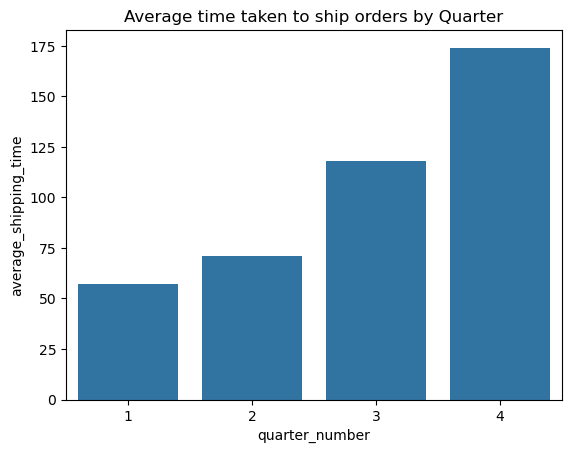

In [141]:
query =  """
SELECT 
      quarter_number, 
	  AVG(datediff(ship_date, order_date)) AS average_shipping_time
FROM order_t
GROUP BY quarter_number
ORDER BY 1
"""

df = pd.read_sql_query(query, conn)

plt.title('Average time taken to ship orders by Quarter')
sns.barplot(data=df, x='quarter_number', y='average_shipping_time')